In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [97]:
df = sns.load_dataset("titanic")

In [98]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [99]:
X = df[["pclass","sex","age","alone","sibsp","parch","fare"]]
y = df["survived"]

In [100]:
X


,pclass,sex,age,alone,sibsp,parch,fare
0,3,male,22.0,False,1,0,7.2500
1,1,female,38.0,False,1,0,71.2833
2,3,female,26.0,True,0,0,7.9250
3,1,female,35.0,False,1,0,53.1000
4,3,male,35.0,True,0,0,8.0500
...,...,...,...,...,...,...,...
886,2,male,27.0,True,0,0,13.0000
887,1,female,19.0,True,0,0,30.0000
888,3,female,NaN,False,1,2,23.4500
889,1,male,26.0,True,0,0,30.0000


In [101]:
encoder = LabelEncoder()
X["alone"]= encoder.fit_transform(X["alone"])
X["sex"]= encoder.fit_transform(X["sex"])


C:\Users\adars\AppData\Local\Temp\ipykernel_3088\4077177769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["alone"]= encoder.fit_transform(X["alone"])
C:\Users\adars\AppData\Local\Temp\ipykernel_3088\4077177769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sex"]= encoder.fit_transform(X["sex"])


In [102]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [105]:
model = Sequential()

In [106]:
layer1 = Dense(30 , activation = 'relu')
layer2 = Dense(30 , activation = 'relu')
layer4 = Dense(1 , activation = 'sigmoid')

In [107]:
model.add(layer1)
model.add(layer2)
model.add(layer4)

In [108]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy')

In [109]:
history = model.fit(X_train , y_train , epochs = 10 )

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6795
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6834
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6782
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6763
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6636
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6623
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6561
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6612
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6670
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6610


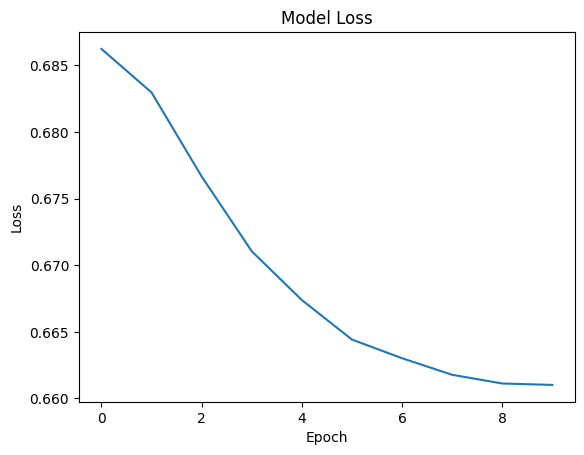

In [110]:
# prompt: create plot using history variable of model.fit

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [111]:
y_predict  = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [112]:
y_predict = np.where(y_predict > 0.5 , 1 , 0)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(y_test , y_predict)

0.5754189944134078